<a href="https://colab.research.google.com/github/kumarrah2002/Fractal_Generator_GPU/blob/main/generator/mandelbrotGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *GPU Acceleration for Mandelbrot Set Generation*
## **Import dependencies**

In [ ]:
#!pip install numba
import numba as nb
from numba import jit, njit, vectorize, cuda, uint32, f8, uint8
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer


## **Generate and Print Mandelbrot using the CPU**

Mandelbrot Sets consist of a simple equation: f(z) = z^2 + c. As you will see after, the designs are very complex so you are probably wondering, **"How do we derive this from one equation?"**. Mandelbrot Sets consist of a simple equation: f(z) = z^2 + c. As you will see after, the designs are very complex so you are probably wondering, **"How do we derive this from one equation?"**. 

In [ ]:
def mandelbrot_cpu(x, y, n, iterations):
  c = complex(x, y)
  z = 0j

  for i in range(iterations):
    z = z**n + c
    if(z.real*z.real + z.imag*z.imag) >= 4:
      return i
  return iterations




For this, we turn to the complex plane. The complex plane is like your standard x-y plane but the y-axis consists of imaginary numbers and the x-axis is the real numbers. To create a mandelbrot, a complex tuple is passed in for *c* and *z* is set to 0. Once f(z) is calculated, that value is now the new value of z and a new number is calculated. This process is repeated until the sum of the z coordinate exceeds a limit (in this case, 4). In order to create the stunning visual, the repetition of this function results in z either approaching infinity or staying bounded within two values. The bounded region in a Mandelbrot is the dark region within the shape and everything outside of the shape is the infinite region. 








Mandelbrot created in 43.187308 sec. using CPU


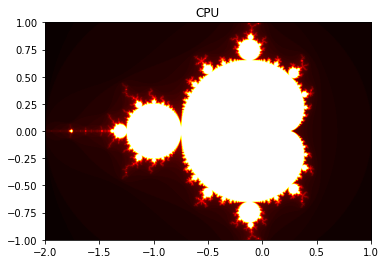

In [ ]:
dim = 2000 #dimensions
n = 2

result_cpu = np.zeros([dim, dim])

start = timer()

for row_index, x in enumerate(np.linspace(-2, 1, num=dim)):
  for col_index, y in enumerate(np.linspace(-1, 1, num=dim)):
    result_cpu[row_index, col_index] = mandelbrot_cpu(x, y, n, 100)
      

end = timer() - start
plt.imshow(result_cpu.T, cmap='hot', interpolation = 'bilinear', extent = [-2, 1, -1, 1]),plt.title('CPU')
print("Mandelbrot created in %f sec. using CPU" % end)

To create this in Python, we first instantiate an array of zeros using Numpy. An image size is established using matplotlib's pyplot to then generate the mandelbrot visual. From there, we iterate through each pixel in the image and apply the Mandelbrot function to determine whether it approaches infinity or stays bounded. This process is repeated until all pixels have been calculated. 
If we increase the number of iterations of recursion, the image will become more defined at the cost of time. As you can see, this process is pretty long since each pizel must be iterated. One way to speed this generation up is by using a GPU. 

## **Generate and Print Mandelbrot using the GPU**

## **GPU Inspection**

In [ ]:
!nvidia-smi

Thu Nov 24 01:59:00 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

We are using a Tesla T4 GPU using Cuda 11.4. When we instantiate Numba's @njit decorator, we must specify that we are using a CUDA powered GPU. 

Mandelbrot created in 4.297059 sec. using GPU


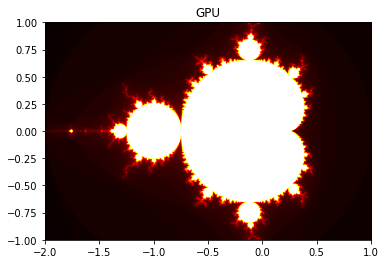

In [ ]:
#x = Real Axis
#y = Imaginary Axis

@nb.njit(target_backend='cuda') 
def mandelbrot_gpu(x, y, n, iterations):
  c = complex(x, y)
  z = 0j

  for i in range(iterations):
    z = z**n + c
    if(z.real*z.real + z.imag*z.imag) >= 4:
      return i
  return iterations

dim = 2000 #dimensions
n = 2

result_gpu = np.zeros([dim, dim])

start_gpu = timer()
for row_index, x in enumerate(np.linspace(-2, 1, num=dim)):
  for col_index, y in enumerate(np.linspace(-1, 1, num=dim)):
    result_gpu[row_index, col_index] = mandelbrot_gpu(x, y, n, 100)
      

end_gpu = timer() - start_gpu

plt.imshow(result_gpu.T, cmap='hot', interpolation = 'bilinear', extent = [-2, 1, -1, 1]),plt.title('GPU')
print("Mandelbrot created in %f sec. using GPU" % end_gpu)


This process is exactly identical to the function defined above except for one line: where we instantiate numba.njit. Numba is a high performance Python compiler that speeds processing of Numpy arrays and functions using an available GPU. NJIT is Numba's Just-In-Time compiler that assigns processes to a specified kernel. Since we specify our GPU back end to be CUDA, we move our processes from the standard Python kernel to the CUDA kernel, hence resulting in a faster generation of the Mandelbrot Set compared to using the CPU. 

(<matplotlib.image.AxesImage at 0x7f3ae30a77d0>,
 Text(0.5, 1.0, 'GPU'),
 (-0.15, -0.05, -1.0, -0.9))

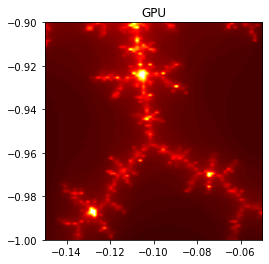

In [ ]:
plt.imshow(result_gpu.T, cmap='hot', interpolation = 'bilinear', extent = [-2, 1, -1, 1]),plt.title('GPU'), plt.axis([-0.15, -0.05, -1, -0.9])

If we zoom in closely at the edge where the bounded region and the infinite region meet, we see something very interesting. There seems to be more shapes that are created! These shapes are called the Julia Set. More info about this set is given in the juliaGeneration.ipynb file

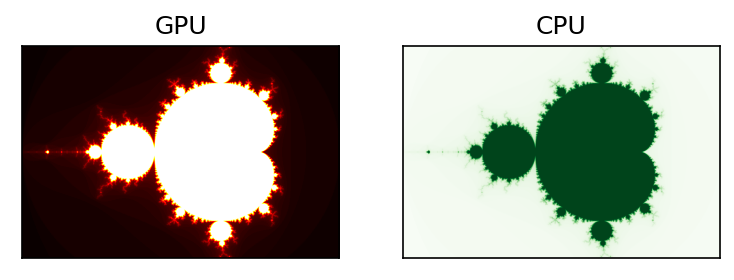

Mandelbrot created in 59.502842 sec. using CPU
Mandelbrot created in 4.297059 sec. using GPU
GPU is 13.847341x more powerful than using CPU for Mandelbrot Fractals


In [ ]:


plt.figure(dpi=150)
plt.subplot(121),plt.imshow(result_gpu.T, cmap='hot', interpolation = 'bilinear', extent = [-2, 1, -1, 1]),plt.title('GPU')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(result_cpu.T, cmap='Greens', interpolation = 'bilinear', extent = [-2, 1, -1, 1]),plt.title('CPU')
plt.xticks([]), plt.yticks([])
plt.show()

print("Mandelbrot created in %f sec. using CPU" % end)
print("Mandelbrot created in %f sec. using GPU" % end_gpu)
print("GPU is %fx more powerful than using CPU for Mandelbrot Fractals" % (end / end_gpu))



**For complex calculations such as this, it is clear that GPU computing is superior to running these processes on the CPU with an almost 10x speed-up!**